# Predicting Compressive Strength of Concrete

### Introduction:

In this machine learning project, we will dive into the cement manufacturing industry. We will be predicting the compressive strength of concrete with as many as 18+ different algorithms by doing feature engineering, model tuning and selection to get
the best model.

### Description about Compressive Strength:

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce the size, as opposed to tensile strength, which withstands loads tending to elongate.

compressive strength is one of the most important engineering properties of concrete. It is a standard industry practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ from country to country based on the design code.

The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

### Attribute Information About Dataset:



* Cement (component 1) — quantitative — kg in a m3 mixture — Input Variable

* Blast Furnace Slag (component 2) — quantitative — kg in a m3 mixture — Input Variable

* Fly Ash (component 3) — quantitative — kg in a m3 mixture — Input Variable

* Water (component 4) — quantitative — kg in a m3 mixture — Input Variable

* Superplasticizer (component 5) — quantitative — kg in a m3 mixture — Input Variable

* Coarse Aggregate (component 6) — quantitative — kg in a m3 mixture — Input Variable

* Fine Aggregate (component 7) — quantitative — kg in a m3 mixture — Input Variable

* Age — quantitative — Day (1~365) — Input Variable

* Concrete compressive strength — quantitative — MPa(megapascals) — Output Variable

### It is a Regression Problem !

# SCRIPT

#### Imports

In [1]:
from pyforest import *
import joblib
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
lazy_imports()

['from sklearn import metrics',
 'import os',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import tensorflow as tf',
 'from pyspark import SparkContext',
 'import datetime as dt',
 'import matplotlib.pyplot as plt',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import LinearRegression',
 'import sklearn',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import plotly as py',
 'import tqdm',
 'from sklearn.linear_model import ElasticNet',
 'from openpyxl import load_workbook',
 'from sklearn.linear_model import LogisticRegression',
 'import sys',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import keras',
 'from sklearn.model_selection import KFold',
 'from pathlib import Path',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from xlrd import open_workbook',
 'from sklearn.model_selection import train_test_split',
 'from dask import dataframe as dd',

#### Reading Dataset

In [3]:
df = pd.read_csv('dataset/compresive_strength_concrete+2.csv',header = 0)
df.head()

<IPython.core.display.Javascript object>

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Pre Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
#### renaming the attributes for easy annotation
df.rename({"Cement (component 1)(kg in a m^3 mixture)":"Cement",
                    "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Blast_Furnace_Slag",
                    "Fly Ash (component 3)(kg in a m^3 mixture)":"Fly_Ash",
                    "Water  (component 4)(kg in a m^3 mixture)":"Water",
                    "Superplasticizer (component 5)(kg in a m^3 mixture)":"Superplasticizer",
                    "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Coarse_Aggregate",
                    "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine_Aggregate",
                    "Age (day)":"Age",
                    "Concrete compressive strength(MPa, megapascals) ":"Concrete_Strength" },axis = 'columns',inplace = True)
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_Furnace_Slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Concrete_Strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observations:
* Here the last column "Concrete Strength" is our output variable
* Moreover our data is clean and doesnot contain any null values

#### EDA (Univariant Analysis)

In [7]:
#### copy dataframe for safe and reference
df_eda = df.copy()

for my reference and learning .The following process is same as finding describe and boxplot to detect outliers\
in my data

In [8]:
#### Quantiles and interquantile range for Blast_Furnace_Slag

Q1 = df_eda['Blast_Furnace_Slag'].quantile(q = 0.25)
Q3 = df_eda['Blast_Furnace_Slag'].quantile(q = 0.75)

print('25 percentile: ',Q1)
print('75 percentile: ',Q3)
print('InterQuantile Range: ',stats.iqr(df_eda['Blast_Furnace_Slag']))

25 percentile:  0.0
75 percentile:  142.95


<IPython.core.display.Javascript object>

InterQuantile Range:  142.95


In [9]:
#### Setting limits for Outliers

lower_limit = Q1 - 1.5*(Q3-Q1)
upper_limit = Q3 + 1.5*(Q3-Q1)

print(upper_limit)
print(lower_limit)
print('Number of outliers in the upper part : ',
      df_eda[df_eda['Blast_Furnace_Slag'] > upper_limit]['Blast_Furnace_Slag'].count())
print('Number of outliers in the lower part : ',
      df_eda[df_eda['Blast_Furnace_Slag'] < lower_limit]['Blast_Furnace_Slag'].count())

357.375
-214.42499999999998
Number of outliers in the upper part :  2
Number of outliers in the lower part :  0


<IPython.core.display.Javascript object>

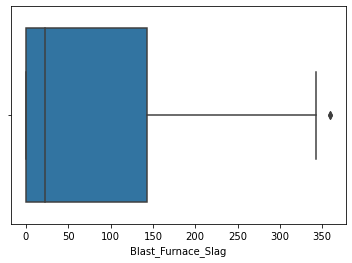

In [10]:
#### verifing using boxplot

sns.boxplot(data = df_eda,x = 'Blast_Furnace_Slag',orient = 'h')

#### EDA (Multivariant Analysis)

In [11]:
#### describe
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast_Furnace_Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly_Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse_Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine_Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete_Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

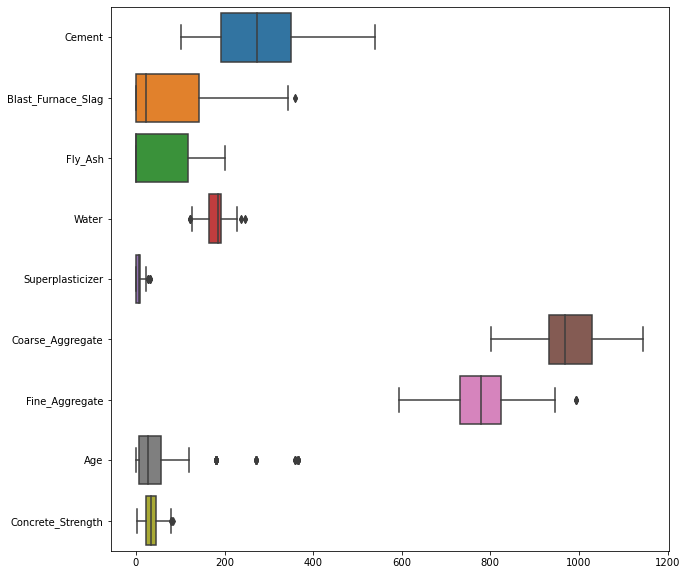

In [12]:
#### Boxplot (outlier detection)
plt.figure(figsize = (10,10))
sns.boxplot(data = df_eda,orient = 'h')

In [13]:
#### detecting number of outliers

for i,column in enumerate(df_eda.columns):
    Q1 = df_eda[column].quantile(q = 0.25)
    Q3 = df_eda[column].quantile(q = 0.75)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    upper_limit = Q3 + 1.5*(Q3-Q1)
    print('Number of outliers in the upper part of {} : '.format(column),
      df_eda[df_eda[column] > upper_limit][column].count())
    print('Number of outliers in the lower part of {}: '.format(column),
      df_eda[df_eda[column] < lower_limit][column].count()) 


Number of outliers in the upper part of Cement :  0
Number of outliers in the lower part of Cement:  0
Number of outliers in the upper part of Blast_Furnace_Slag :  2
Number of outliers in the lower part of Blast_Furnace_Slag:  0
Number of outliers in the upper part of Fly_Ash :  0
Number of outliers in the lower part of Fly_Ash:  0
Number of outliers in the upper part of Water :  4
Number of outliers in the lower part of Water:  5
Number of outliers in the upper part of Superplasticizer :  10
Number of outliers in the lower part of Superplasticizer:  0
Number of outliers in the upper part of Coarse_Aggregate :  0
Number of outliers in the lower part of Coarse_Aggregate:  0
Number of outliers in the upper part of Fine_Aggregate :  5
Number of outliers in the lower part of Fine_Aggregate:  0
Number of outliers in the upper part of Age :  59
Number of outliers in the lower part of Age:  0
Number of outliers in the upper part of Concrete_Strength :  4
Number of outliers in the lower part 

Here the attributes containing outlier are :
* Blast_Furnace_Slag
* Water
* Supperplasticizer
* Fine_Aggregate
* Age
* Concrete_Strength

But here the Concrete_Strength is the output variable so we will ignore the outliers in that attribute.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

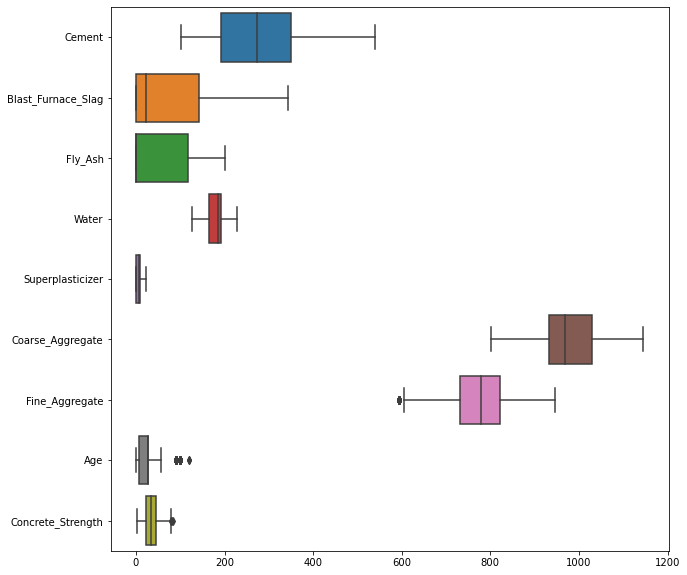

In [14]:
#### Treating outliers
for cols in df.columns[:-1]:
    Q1 = df_eda[cols].quantile(q = 0.25)
    Q3 = df_eda[cols].quantile(q = 0.75)
    
    lower_limit = Q1 - 1.5*(Q3-Q1)
    upper_limit = Q3 + 1.5*(Q3-Q1)
    
    df_eda.loc[(df_eda[cols] >upper_limit) | (df_eda[cols] < lower_limit),cols] = df[cols].median()
    

plt.figure(figsize = (10,10))
sns.boxplot(data = df_eda,orient = 'h')  

Here the outliers can be replaced with mean ,median ,mode , upper limit or lower limit

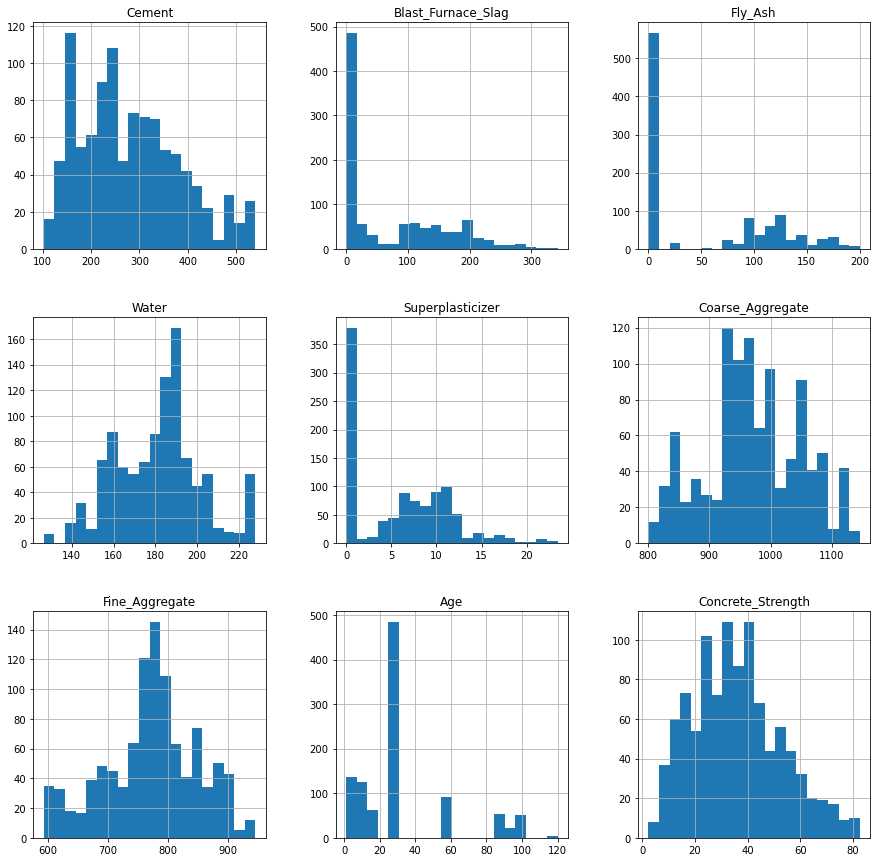

In [15]:
#### distplot
df_eda.hist(bins = 20,figsize = (15,15));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

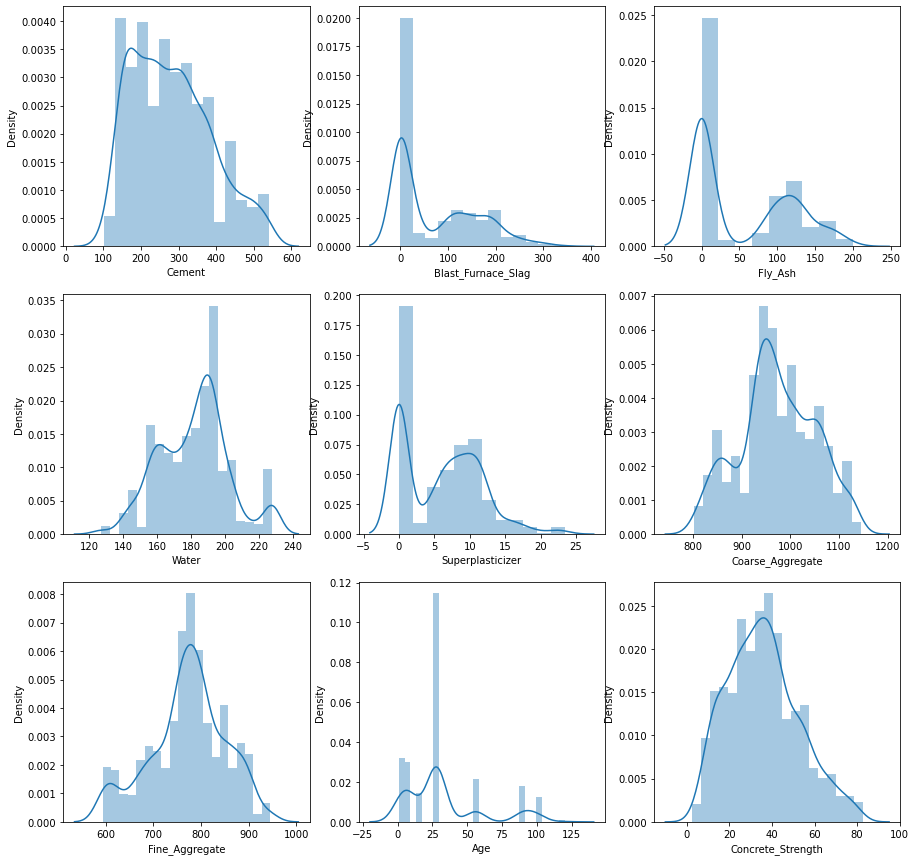

In [16]:
#### distplot
# Create the subplots
fig, axes = plt.subplots(3,3,figsize = (15,15))
for i, column in enumerate(df_eda.columns):
    sns.distplot(df_eda[column],ax=axes[i//3,i%3])

<IPython.core.display.Javascript object>

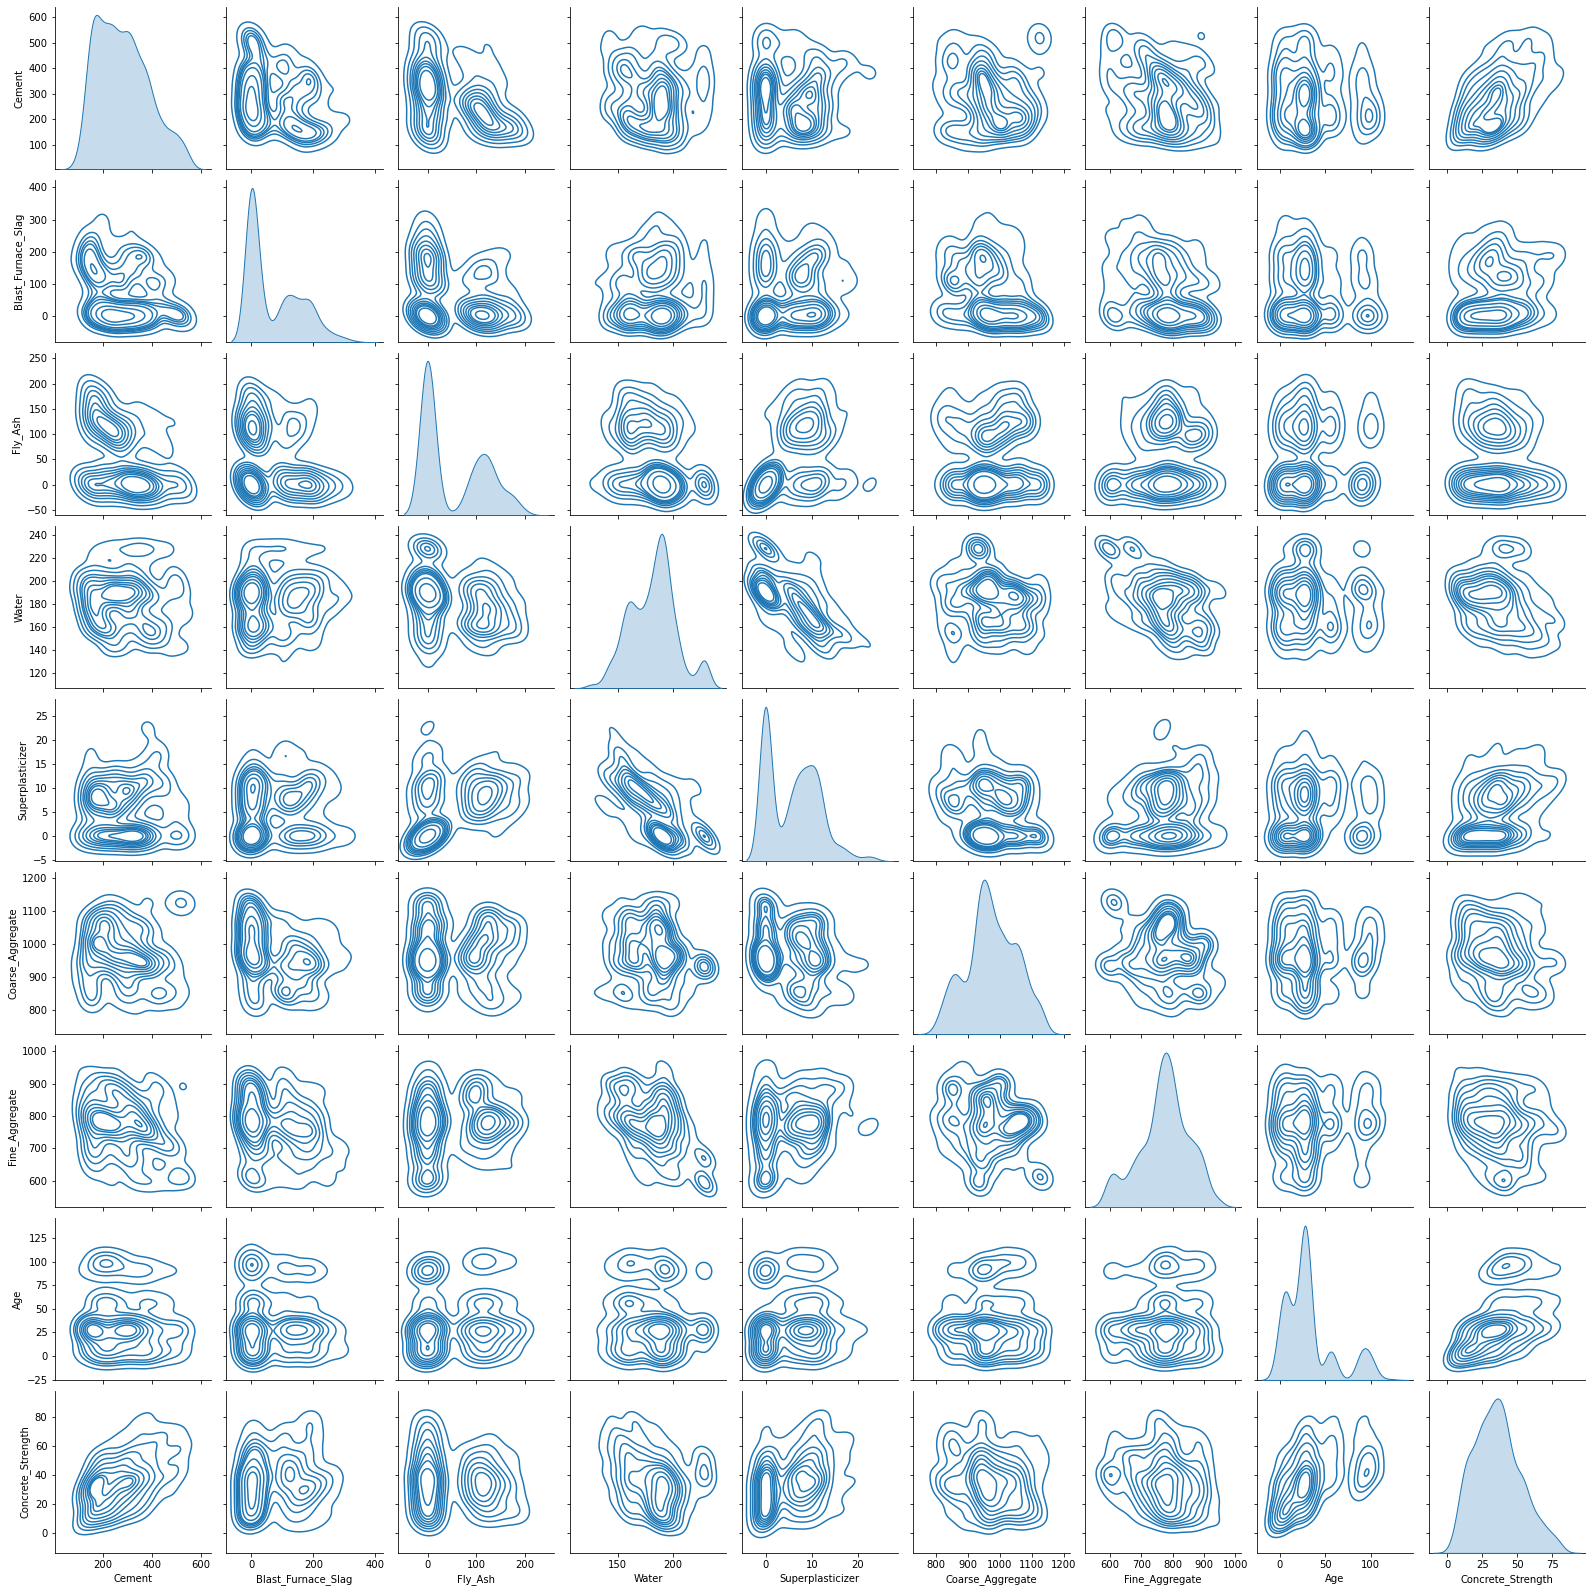

In [17]:
#### pairplot
sns.pairplot(data = df_eda,kind = 'kde')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

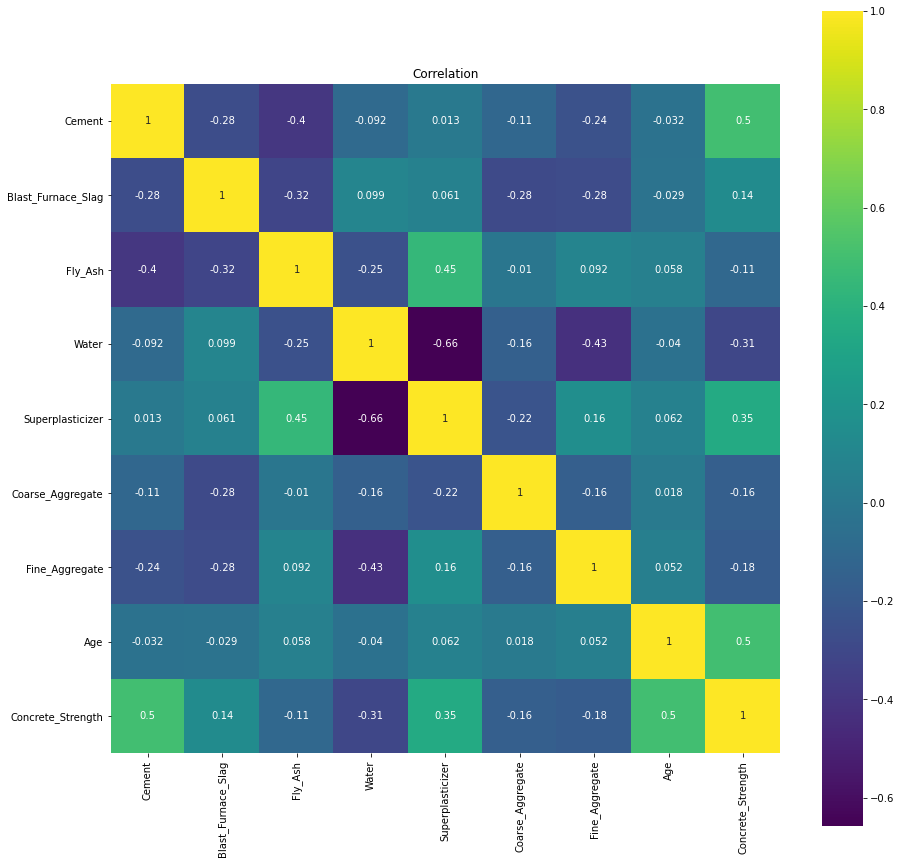

In [18]:
#### correlation
plt.figure(figsize = (15,15))
sns.heatmap(df_eda.corr(),annot = True,vmax = 1,square = True,cmap = 'viridis')
plt.title('Correlation')
plt.show()

#### Train Test Split Data Transformation

In [19]:
y = df_eda['Concrete_Strength']
X = df_eda.drop(['Concrete_Strength'],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 1)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Model Creation

##### Random Forest Regressor

In [20]:
model1 = RandomForestRegressor(random_state = 9).fit(X_train,y_train)

<IPython.core.display.Javascript object>

In [21]:
### metrics for Random Forest Regressor
## R2 Score
r2_score1 = metrics.r2_score(y_test,model1.predict(X_test))

## MSE
mse1 = metrics.mean_squared_error(y_test,model1.predict(X_test))

print("R2 : ",r2_score1)
print("MSE : ",mse1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 :  0.8351097616278502
MSE :  43.21891852437871


In [22]:
## putting into dataframe
res = pd.DataFrame({'Model':'Random Forest Regressor','r2_score':r2_score1},index = {'1'})
result = res[['Model','r2_score']]
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.83511


##### Kfold Validation Random forest Regressor

In [23]:
scalar = StandardScaler()
rfr = RandomForestRegressor()

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', rfr)])

cv = KFold(n_splits=20, random_state = 13)
scores = cross_val_score(pipeline, X, y, cv = cv)
accuracy = np.mean(abs(scores))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7342452229791634

In [24]:
## putting into dataframe
res = pd.DataFrame({'Model':'K-Fold Random Forest Regressor','r2_score':accuracy},index = {'2'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245


##### Gradient Boosting Regressor

In [25]:
model3 = GradientBoostingRegressor(max_depth = 3).fit(X_train,y_train)

<IPython.core.display.Javascript object>

In [26]:
### metrics for Gradient Boosting Regressor
## R2 Score
r2_score3 = metrics.r2_score(y_test,model3.predict(X_test))

## MSE
mse3 = metrics.mean_squared_error(y_test,model3.predict(X_test))

print("R2 : ",r2_score3)
print("MSE : ",mse3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 :  0.8320016164938444
MSE :  44.03358573958014


In [27]:
## putting into dataframe
res = pd.DataFrame({'Model':'Gradient Boosting Regressor','r2_score':r2_score3},index = {'3'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002


##### Kfold Gradient Boosting Regressor

In [28]:
scalar = StandardScaler()
gbr = GradientBoostingRegressor()

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', gbr)])

cv = KFold(n_splits=20, random_state = 13)
scores = cross_val_score(pipeline, X, y, cv = cv)
accuracy = np.mean(abs(scores))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7711617268888767

In [29]:
## putting into dataframe
res = pd.DataFrame({'Model':'K-Fold Gradient Boosting Regressor','r2_score':accuracy},index = {'4'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162


##### Ada Boost Regressor

In [30]:
from sklearn.ensemble import AdaBoostRegressor
model4 = AdaBoostRegressor().fit(X_train,y_train)

In [31]:
### metrics for Ada Boost Regressor
## R2 Score
r2_score4 = metrics.r2_score(y_test,model4.predict(X_test))

## MSE
mse4 = metrics.mean_squared_error(y_test,model4.predict(X_test))

print("R2 : ",r2_score4)
print("MSE : ",mse4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 :  0.7494501374434573
MSE :  65.67092268789182


In [32]:
## putting into dataframe
res = pd.DataFrame({'Model':'Ada Boost Regressor','r2_score':r2_score4},index = {'5'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450


##### K-Fold Ada Boosting

In [33]:
scalar = StandardScaler()
adr = AdaBoostRegressor()

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', adr)])

cv = KFold(n_splits=20, random_state = 13)
scores = cross_val_score(pipeline, X, y, cv = cv)
accuracy = np.mean(abs(scores))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5810706418927742

In [34]:
## putting into dataframe
res = pd.DataFrame({'Model':'K-Fold Ada Boost Regressor','r2_score':accuracy},index = {'6'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071


##### KNN Regressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor

grid = GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1,45) }).fit(X_train,y_train)

print(grid.best_params_)
model7 = grid.best_estimator_

<IPython.core.display.Javascript object>

{'n_neighbors': 4}


In [36]:
### metrics for Ada Boost Regressor
## R2 Score
r2_score7 = metrics.r2_score(y_test,model7.predict(X_test))

## MSE
mse7 = metrics.mean_squared_error(y_test,model7.predict(X_test))

print("R2 : ",r2_score7)
print("MSE : ",mse7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 :  0.7501965080141264
MSE :  65.4752935881877


In [37]:
#### putting into dataframe
res = pd.DataFrame({'Model':'KNN Regressor','r2_score':r2_score7},index = {'7'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197


##### K-Fold KNN

In [38]:
scalar = StandardScaler()
knn = KNeighborsRegressor(n_neighbors = 4)

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', knn)])

cv = KFold(n_splits=20, random_state = 13)
scores = cross_val_score(pipeline, X, y, cv = cv)
accuracy = np.mean(abs(scores))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6555760814404901

In [39]:
## putting into dataframe
res = pd.DataFrame({'Model':'K-Fold KNN Regressor','r2_score':accuracy},index = {'8'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197
8,K-Fold KNN Regressor,0.655576


##### Bagging Regressor

In [40]:
from sklearn.ensemble import BaggingRegressor

model9 = BaggingRegressor().fit(X_train,y_train)

In [41]:
### metrics for Ada Boost Regressor
## R2 Score
r2_score9 = metrics.r2_score(y_test,model9.predict(X_test))

## MSE
mse9 = metrics.mean_squared_error(y_test,model9.predict(X_test))

print("R2 : ",r2_score9)
print("MSE : ",mse9)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 :  0.815246421971692
MSE :  48.42524284470648


In [42]:
## putting into dataframe
res = pd.DataFrame({'Model':'Bagging Regressor','r2_score':r2_score9},index = {'9'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197
8,K-Fold KNN Regressor,0.655576
9,Bagging Regressor,0.815246


##### K-Fold Bagging Regressor

In [43]:
scalar = StandardScaler()
br = BaggingRegressor()

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', br)])

cv = KFold(n_splits=20, random_state = 13)
scores = cross_val_score(pipeline, X, y, cv = cv)
accuracy = np.mean(abs(scores))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7228641788377412

In [44]:
## putting into dataframe
res = pd.DataFrame({'Model':'K-Fold KNN Regressor','r2_score':accuracy},index = {'10'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197
8,K-Fold KNN Regressor,0.655576
9,Bagging Regressor,0.815246
10,K-Fold KNN Regressor,0.722864


##### Support Vector Machine

In [45]:
grid = GridSearchCV(estimator = svm.SVR(),param_grid = {'kernel':['linear','rbf','poly']}).fit(X_train,y_train)
print(grid.best_params_)
svreg = grid.best_estimator_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'kernel': 'linear'}


In [46]:
### metrics for Ada Boost Regressor
## R2 Score
r2_score10 = metrics.r2_score(y_test,svreg.predict(X_test))

## MSE
mse10 = metrics.mean_squared_error(y_test,svreg.predict(X_test))

print("R2 : ",r2_score10)
print("MSE : ",mse10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 :  0.649897514369719
MSE :  91.76438187618778


In [47]:
## putting into dataframe
res = pd.DataFrame({'Model':'Support vector Regressor','r2_score':r2_score9},index = {'11'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197
8,K-Fold KNN Regressor,0.655576
9,Bagging Regressor,0.815246
10,K-Fold KNN Regressor,0.722864


##### K-Fold Support Vector Regressor

In [48]:
scalar = StandardScaler()
svr = svm.SVR(kernel = 'linear')

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', svr)])

cv = KFold(n_splits=20, random_state = 13)
scores = cross_val_score(pipeline, X, y, cv = cv)
accuracy = np.mean(abs(scores))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6150852974901532

In [49]:
## putting into dataframe
res = pd.DataFrame({'Model':'K-Fold Support Vector Regressor','r2_score':accuracy},index = {'12'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197
8,K-Fold KNN Regressor,0.655576
9,Bagging Regressor,0.815246
10,K-Fold KNN Regressor,0.722864


##### XGBoost Regressor

In [50]:
model = xgb.XGBRegressor()
grid = GridSearchCV(estimator = model,param_grid = {'max_depth':range(2,8),
                                                                     'n_estimator':[100,200,500]}).fit(X_train,y_train)
print(grid.best_params_)
xgbr = grid.best_estimator_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[17:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in


[17:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used i

[17:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in

In [51]:
### metrics for Ada Boost Regressor
## R2 Score
r2_score11 = metrics.r2_score(y_test,xgbr.predict(X_test))

## MSE
mse11 = metrics.mean_squared_error(y_test,xgbr.predict(X_test))

print("R2 : ",r2_score11)
print("MSE : ",mse11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 :  0.8447906093842455
MSE :  40.68149863487463


In [52]:
## putting into dataframe
res = pd.DataFrame({'Model':' XGBoost Regressor','r2_score':r2_score11},index = {'13'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197
8,K-Fold KNN Regressor,0.655576
9,Bagging Regressor,0.815246
10,K-Fold KNN Regressor,0.722864


##### Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
Decision = DecisionTreeRegressor().fit(X_train,y_train)

In [54]:
### metrics for Decision Tree Regressor
## R2 Score
r2_score14 = metrics.r2_score(y_test,Decision.predict(X_test))

## MSE
mse14 = metrics.mean_squared_error(y_test,Decision.predict(X_test))

print("R2 : ",r2_score14)
print("MSE : ",mse14)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 :  0.7018487719697593
MSE :  78.14758326141676


In [55]:
#### feature importance
print('Feature Importance : ',pd.DataFrame(Decision.feature_importances_,columns = ['Importance'],index = X.columns))

<IPython.core.display.Javascript object>

Feature Importance :                      Importance
Cement                0.308988
Blast_Furnace_Slag    0.059169
Fly_Ash               0.008017
Water                 0.124457
Superplasticizer      0.049039
Coarse_Aggregate      0.027980
Fine_Aggregate        0.049377
Age                   0.372973


In [56]:
## putting into dataframe
res = pd.DataFrame({'Model':' Decision Tree Regressor','r2_score':r2_score14},index = {'14'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197
8,K-Fold KNN Regressor,0.655576
9,Bagging Regressor,0.815246
10,K-Fold KNN Regressor,0.722864


##### K-Fold Decision Tree Regressor

In [57]:
scalar = StandardScaler()
dtr = DecisionTreeRegressor()

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', dtr)])

cv = KFold(n_splits=18, random_state = 13)
scores = cross_val_score(pipeline, X, y, cv = cv)
accuracy = np.mean(abs(scores))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7476424841602678

In [58]:
## putting into dataframe
res = pd.DataFrame({'Model':'K-Fold Decision Tree Regressor','r2_score':accuracy},index = {'15'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197
8,K-Fold KNN Regressor,0.655576
9,Bagging Regressor,0.815246
10,K-Fold KNN Regressor,0.722864


##### Feature Selection using feature importance

In [59]:
#### feature importance
print('Feature Importance : ',pd.DataFrame(Decision.feature_importances_,columns = ['Importance'],index = X.columns))

<IPython.core.display.Javascript object>

Feature Importance :                      Importance
Cement                0.308988
Blast_Furnace_Slag    0.059169
Fly_Ash               0.008017
Water                 0.124457
Superplasticizer      0.049039
Coarse_Aggregate      0.027980
Fine_Aggregate        0.049377
Age                   0.372973


#### Selecting higher important features

In [60]:
df_select = df_eda.copy()

In [61]:
X = df_select[['Cement','Water','Age','Blast_Furnace_Slag','Fine_Aggregate']]
y = df_select['Concrete_Strength']

#### Split x and y 
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.3,random_state = 13)

#### scaling

scaler1 = StandardScaler()
X_train1 = scaler1.fit_transform(X_train1)
X_test1 = scaler1.fit_transform(X_test1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### updated decision tree regressor

In [62]:
up_dec = DecisionTreeRegressor(max_depth = 4,random_state =1, min_samples_leaf = 5).fit(X_train1,y_train1)

In [63]:
### metrics for Decision Tree Regressor
## R2 Score
r2_score15 = metrics.r2_score(y_test1,up_dec.predict(X_test1))

## MSE
mse15 = metrics.mean_squared_error(y_test1,up_dec.predict(X_test1))

print("R2 : ",r2_score15)
print("MSE : ",mse15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 :  0.6355699051391598
MSE :  103.87207715054798


In [64]:
## putting into dataframe
res = pd.DataFrame({'Model':'selected columns Decision Tree Regressor','r2_score':r2_score15},index = {'16'})
result = result.append(res)
result

<IPython.core.display.Javascript object>

,Model,r2_score
1,Random Forest Regressor,0.835110
2,K-Fold Random Forest Regressor,0.734245
3,Gradient Boosting Regressor,0.832002
4,K-Fold Gradient Boosting Regressor,0.771162
5,Ada Boost Regressor,0.749450
6,K-Fold Ada Boost Regressor,0.581071
7,KNN Regressor,0.750197
8,K-Fold KNN Regressor,0.655576
9,Bagging Regressor,0.815246
10,K-Fold KNN Regressor,0.722864


In [65]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [ ]:
conda install pydot-ng 

In [ ]:
dot_data =StringIO()
export_graphviz(up_dec,out_file = dot_data,filled = True,rounded = True,special_characters = True,
                feature_names = X.columns,class_names =['0','1'] )
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('concrete_decision_tree.png')
Image(graph.create_png())

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz2.38/bin/'

##### K-Fold DecisionTreeRegressor pruned

In [ ]:
scalar = StandardScaler()
dtr = DecisionTreeRegressor(max_depth = 4,random_state =1, min_samples_leaf = 5)

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', scalar), ('estimator', dtr)])

cv = KFold(n_splits=18, random_state = 13)
scores = cross_val_score(pipeline, X, y, cv = cv)
accuracy = np.mean(abs(scores))
accuracy

In [ ]:
## putting into dataframe
res = pd.DataFrame({'Model':'K-Fold Prunned Decision Tree Regressor','r2_score':accuracy},index = {'17'})
result = result.append(res)
result